# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
# establish path

path = path = r'/Users/martyna/Documents/CF Data Analysis/Data Immersion/Achievement 6/COVID Analysis 8.22'

In [4]:
# import data 

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','covid_merged.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,county,state,county_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated,total_doses_given,doses_per_100k,percent_with_at_least_one_dose,people_fully_vaccinated,percent_fully_vaccinated,total_cases,case_rate_per_100k,total_deaths,death_rate_per_100k,total_percent_positive
0,0,American Samoa,American Samoa,47392.0,0.0,2.1,156.14,Low,3/3/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
1,1,American Samoa,American Samoa,47392.0,0.9,19.0,434.67,High,3/10/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
2,2,American Samoa,American Samoa,47392.0,1.0,6.3,901.00,Medium,3/17/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
3,3,American Samoa,American Samoa,47392.0,10.4,0.0,1093.01,High,4/14/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
4,4,American Samoa,American Samoa,47392.0,4.1,80.2,267.98,High,4/21/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79002 entries, 0 to 79001
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          79002 non-null  int64  
 1   county                              79002 non-null  object 
 2   state                               79002 non-null  object 
 3   county_population                   78998 non-null  float64
 4   covid_inpatient_bed_utilization     78862 non-null  float64
 5   covid_hospital_admissions_per_100k  78975 non-null  float64
 6   covid_cases_per_100k                79002 non-null  float64
 7   covid-19_community_level            78978 non-null  object 
 8   date_updated                        79002 non-null  object 
 9   total_doses_given                   79002 non-null  int64  
 10  doses_per_100k                      79002 non-null  float64
 11  percent_with_at_least_one_dose      79002

# 02. Clean data

In [7]:
# make subset without categorical data
# chose columns "per 100k" to keep the scale uniform

df_cluster = df[['covid_hospital_admissions_per_100k',
                'covid_cases_per_100k',
                'doses_per_100k',
                'case_rate_per_100k',
                'death_rate_per_100k']]

In [8]:
df_cluster.head()

,covid_hospital_admissions_per_100k,covid_cases_per_100k,doses_per_100k,case_rate_per_100k,death_rate_per_100k
0,2.1,156.14,259981.0,16969.0,69.0
1,19.0,434.67,259981.0,16969.0,69.0
2,6.3,901.00,259981.0,16969.0,69.0
3,0.0,1093.01,259981.0,16969.0,69.0
4,80.2,267.98,259981.0,16969.0,69.0


In [9]:
df_cluster.describe()

,covid_hospital_admissions_per_100k,covid_cases_per_100k,doses_per_100k,case_rate_per_100k,death_rate_per_100k
count,78975.000000,79002.000000,79002.000000,79002.000000,79002.000000
mean,7.258606,145.236577,231051.970279,28123.993215,313.613402
std,6.957114,204.133005,20108.592375,3068.716771,70.331667
min,0.000000,0.000000,186085.000000,16969.000000,69.000000
25%,2.400000,35.740000,218923.000000,26089.000000,247.000000
50%,5.800000,100.300000,231682.000000,27952.000000,322.000000
75%,10.200000,198.450000,241358.000000,29931.000000,369.000000
max,171.200000,13017.750000,320597.000000,37666.000000,427.000000


In [10]:
df_cluster.isnull().sum()

covid_hospital_admissions_per_100k    27
covid_cases_per_100k                   0
doses_per_100k                         0
case_rate_per_100k                     0
death_rate_per_100k                    0
dtype: int64

Cannot run cluster with null values. As there is a small amount of missing values, will create subset without missing values to run cluster

In [11]:
df_cluster2 = df_cluster[df_cluster['covid_hospital_admissions_per_100k'].isnull()== False]

# 03. Elbow

In [12]:
num_cl = range(1, 10) # defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters in the range assigned above

In [13]:
score = [kmeans[i].fit(df_cluster2).score(df_cluster2) for i in range(len(kmeans))] # creates a score that represents 
# a rate of variation for the given cluster option

score

[-32686825759033.53,
 -14359053347755.748,
 -7006222572645.328,
 -4546250363101.889,
 -2886129897258.6426,
 -2115549240221.819,
 -1809218346151.711,
 -1395082679370.0483,
 -1132322652147.025]

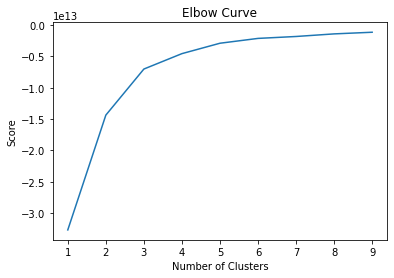

In [14]:
# plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Curve starts flattening after 3 clusters, will use 3 clusters.

# 04. K-Means Clustering

In [15]:
# create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# fit the k-means object to the data.

kmeans.fit(df_cluster2)

KMeans(n_clusters=3)

In [17]:
df_cluster2['clusters'] = kmeans.fit_predict(df_cluster2)

/var/folders/gd/zq96wcpj6d54521g77cwf7sh0000gn/T/ipykernel_33303/1603347386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2['clusters'] = kmeans.fit_predict(df_cluster2)


In [18]:
df_cluster2.head()

,covid_hospital_admissions_per_100k,covid_cases_per_100k,doses_per_100k,case_rate_per_100k,death_rate_per_100k,clusters
0,2.1,156.14,259981.0,16969.0,69.0,1
1,19.0,434.67,259981.0,16969.0,69.0,1
2,6.3,901.00,259981.0,16969.0,69.0,1
3,0.0,1093.01,259981.0,16969.0,69.0,1
4,80.2,267.98,259981.0,16969.0,69.0,1


In [19]:
df_cluster2['clusters'].value_counts()

0    44034
2    18072
1    16869
Name: clusters, dtype: int64

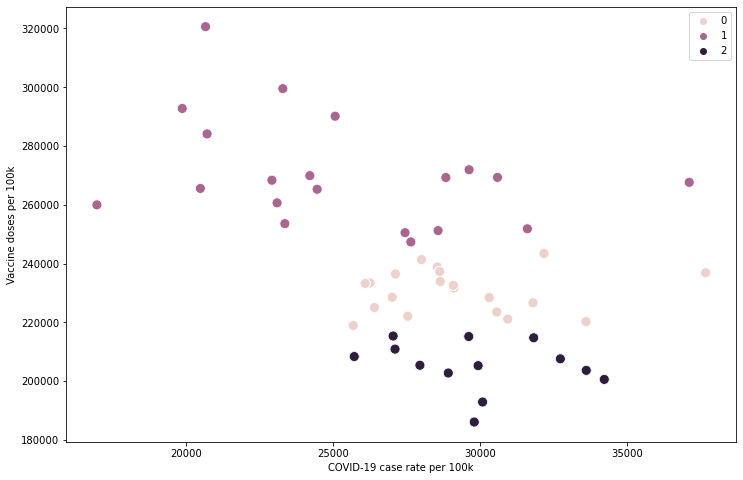

In [20]:
# plot the clusters for the "doses_per_100k" and "case_rate_per_100k" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster2['case_rate_per_100k'], y=df_cluster2['doses_per_100k'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('COVID-19 case rate per 100k') # Label x-axis.
plt.ylabel('Vaccine doses per 100k') # Label y-axis.
plt.show()

While data points from each cluster appear on the high case rate side, data from cluster 2 which is the highest vaccination rate is present in the lower case rate. This enforces the hypothesis that higher vaccination rate will have a lower COVID-19 case rate. 

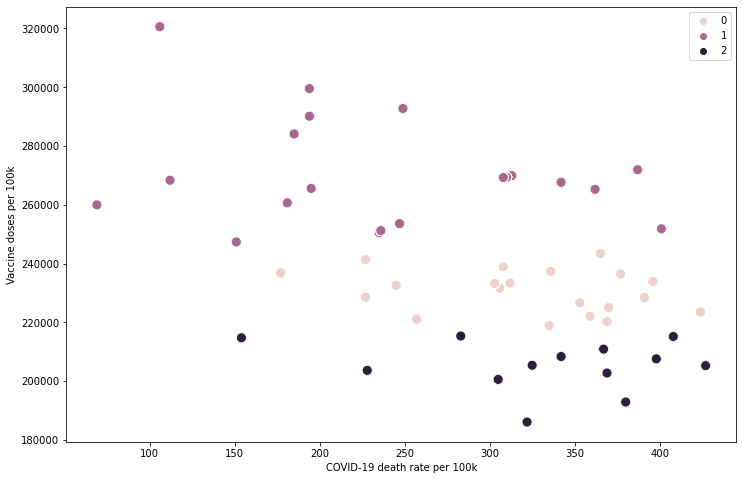

In [21]:
# plot the clusters for the "doses_per_100k" and "death_rate_per_100k" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster2['death_rate_per_100k'], y=df_cluster2['doses_per_100k'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('COVID-19 death rate per 100k') # Label x-axis.
plt.ylabel('Vaccine doses per 100k') # Label y-axis.
plt.show()

Similar to the above scatter plot, cluster 2 has more data points on the left side of the chart which indicates lower COVID-19 death rate. This reinforces the hypothesis that higher vaccination rates will yield lower COVID-19 death rates. 

In [22]:
df_cluster2.loc[df_cluster2['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster2.loc[df_cluster2['clusters'] == 1, 'cluster'] = 'purple'
df_cluster2.loc[df_cluster2['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/gd/zq96wcpj6d54521g77cwf7sh0000gn/T/ipykernel_33303/1428278923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.loc[df_cluster2['clusters'] == 2, 'cluster'] = 'dark purple'


In [23]:
df_cluster2.groupby('cluster').agg({'case_rate_per_100k':['mean', 'median'], 
                                            'doses_per_100k':['mean', 'median'], 
                                            'death_rate_per_100k':['mean', 'median']})

case_rate_per_100k          doses_per_100k            \
                          mean   median           mean    median   
cluster                                                            
dark purple       29499.407260  29613.0  205806.082559  207591.0   
pink              28483.137076  28004.0  230372.353477  232605.0   
purple            25714.042800  24457.0  259864.482127  253586.0   

            death_rate_per_100k         
                           mean median  
cluster                                 
dark purple          355.989985  369.0  
pink                 319.926398  312.0  
purple               251.803723  236.0

The dark purple cluster has the highest mean and median for doses per 100k, and lowest mean and median for case and death rates per 100k. Pink has the lowest mean and median for doses per 100k, and highest mean and median for case and death rates per 100k. Purple is in between these two clusters. 
This all reinforces the previously made hypothesis about vaccines decreasing COVID-19 case rates and death rates.

#### Future Steps
It could be interesting to explore how population density affects these variables. 

In [24]:
# Exporting as csv file

df_cluster2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster.csv'))